In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
data_dir = "C:/Users/SIVA NAGARAJU/Downloads/archive/bccd_wbc"
class_labels = ['eosinophil', 'lymphocyte', 'monocyte','neutrophil','basophil']

In [22]:
filepaths = []
labels = []
for label in class_labels:
    class_dir = os.path.join(data_dir, label)
    for file in os.listdir(class_dir):
        if file.endswith('.jpeg') or file.endswith('.png'):  
            filepaths.append(os.path.join(class_dir, file))
            labels.append(label)


In [ ]:
bloodCell_df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})


In [5]:
#Shuffle the Dataframe
bloodCell_df
bloodCell_df.sample(frac=1).reset_index(drop=True)
bloodCell_df.head()

,filepaths,labels


Found 2800 images belonging to 5 classes.
Found 700 images belonging to 5 classes.


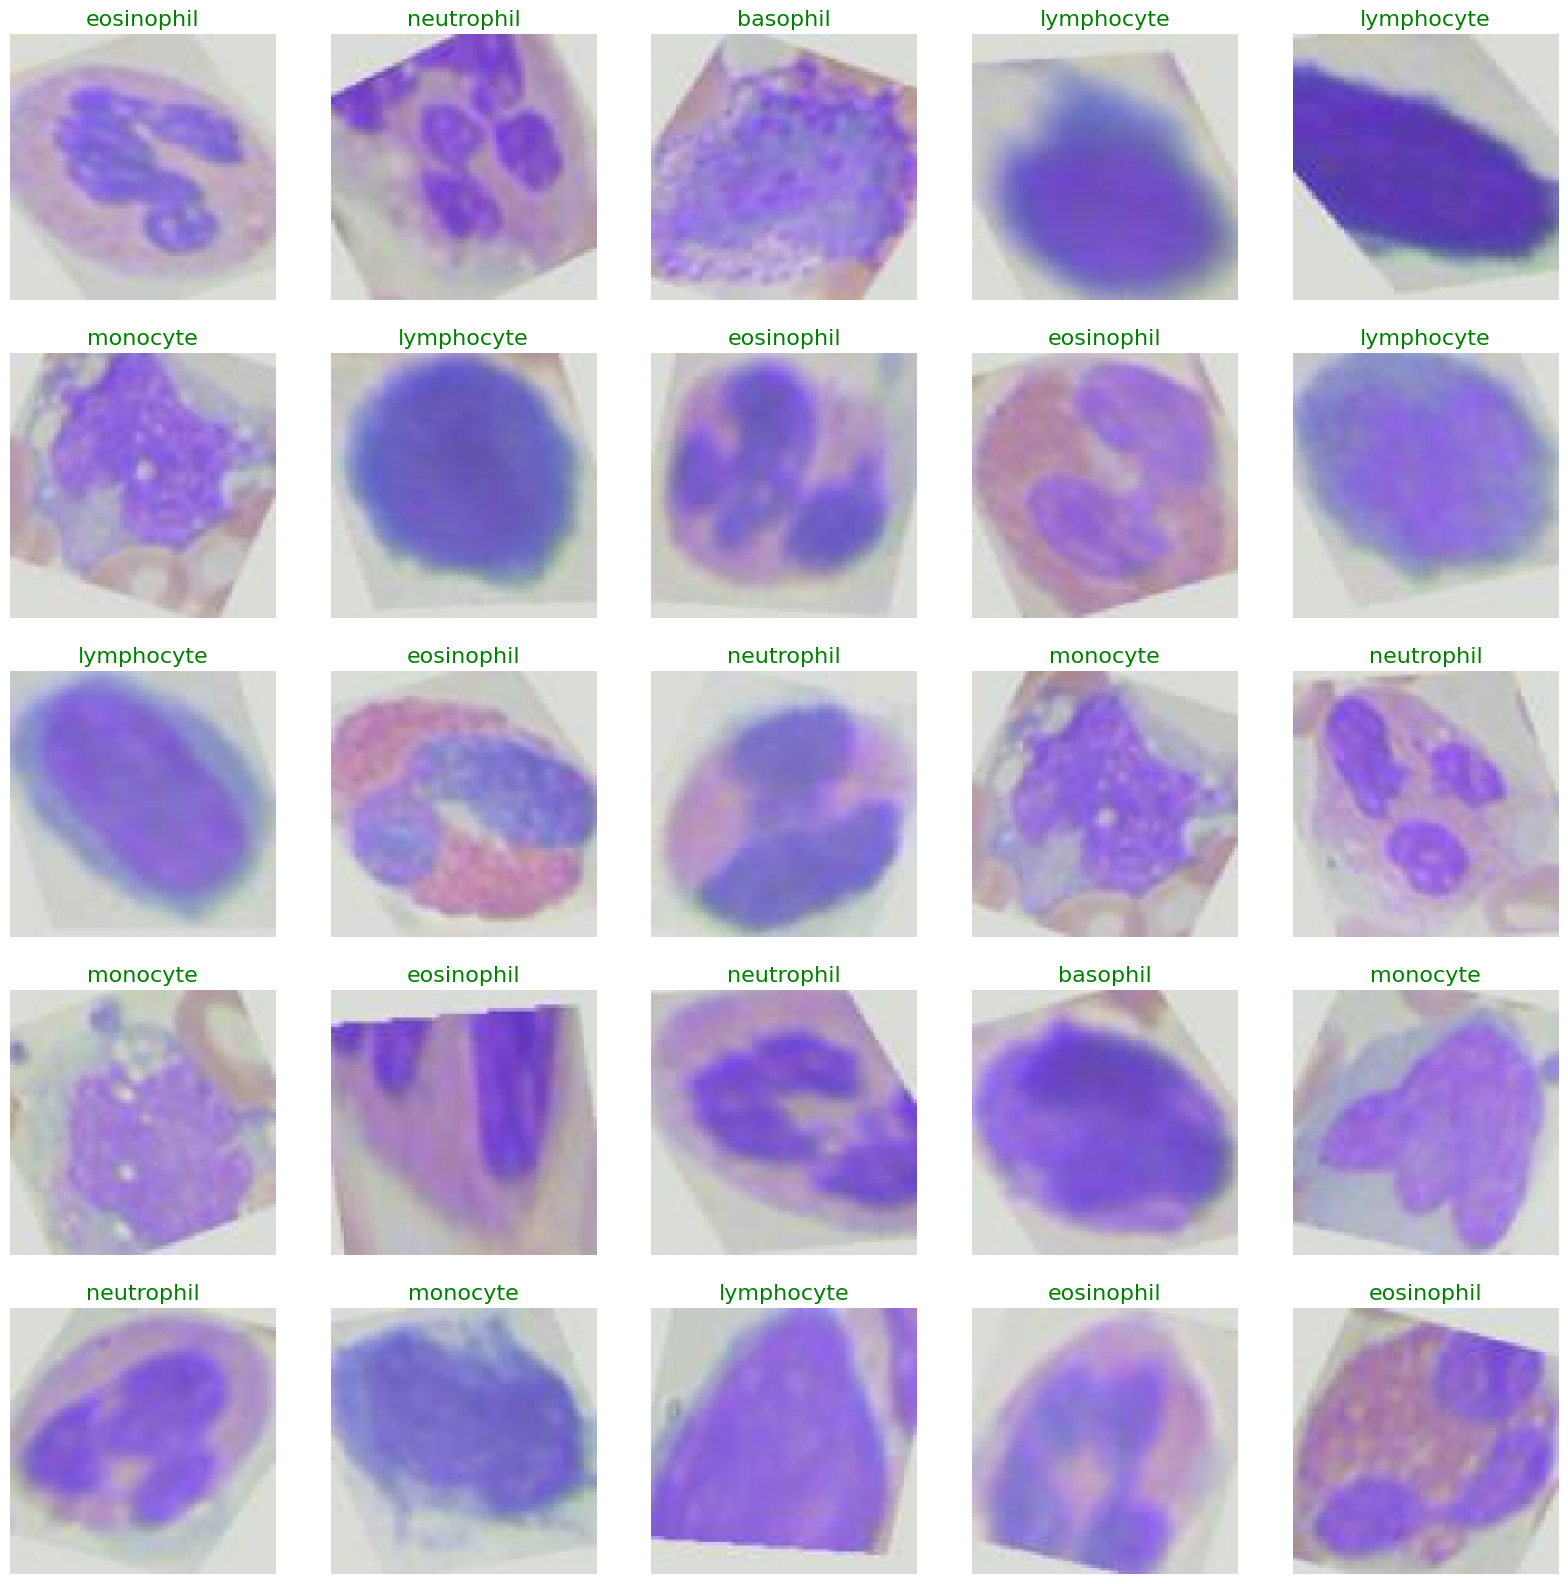

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
data_dir = r"C:\Users\SIVA NAGARAJU\Downloads\archive\bccd_wbc"

# Image generator with MobileNetV2 preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # Split within flow_from_directory
)
# Train generator
train = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
# Validation generator
val = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)
# Show images function
def show_cell_images(image_gen):
    test_dict = image_gen.class_indices
    classes = list(test_dict.keys())
    images, labels = next(image_gen)

    plt.figure(figsize=(20, 20))
    r = min(len(labels), 25)

    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = (images[i] + 1) / 2  
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color="green", fontsize=16)
        plt.axis('off')

    plt.show()
# Call the function
show_cell_images(train)


In [7]:
print("DataFrame shape:", bloodCell_df.shape)
print(bloodCell_df.head())


DataFrame shape: (0, 2)
Empty DataFrame
Columns: [filepaths, labels]
Index: []


In [21]:
import os
import pandas as pd

# Path to your images folder
data_dir = r"C:\Users\SIVA NAGARAJU\Downloads\archive\bccd_wbc"

# Check if path exists
if not os.path.exists(data_dir):
    print("Path does not exist!")
else:
    print("Path found:", data_dir)

# Collect all image file paths and labels
data = []

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if os.path.isdir(label_path):  # skip non-folder items
        for img_name in os.listdir(label_path):
            if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                data.append({
                    'filepaths': os.path.join(label_path, img_name),
                    'labels': label
                })

# Convert to DataFrame
bloodCell_df = pd.DataFrame(data)

# Show summary
print(" DataFrame shape:", bloodCell_df.shape)
print(bloodCell_df.head())


Path found: C:\Users\SIVA NAGARAJU\Downloads\archive\bccd_wbc
 DataFrame shape: (3500, 2)
                                           filepaths    labels
0  C:\Users\SIVA NAGARAJU\Downloads\archive\bccd_...  basophil
1  C:\Users\SIVA NAGARAJU\Downloads\archive\bccd_...  basophil
2  C:\Users\SIVA NAGARAJU\Downloads\archive\bccd_...  basophil
3  C:\Users\SIVA NAGARAJU\Downloads\archive\bccd_...  basophil
4  C:\Users\SIVA NAGARAJU\Downloads\archive\bccd_...  basophil


In [9]:
from sklearn.model_selection import train_test_split

train_images, test_images = train_test_split(
    bloodCell_df, test_size=0.3, random_state=42, stratify=bloodCell_df['labels']
)

train_set, val_set = train_test_split(
    train_images, test_size=0.2, random_state=42, stratify=train_images['labels']
)

print("Train Set Shape:", train_set.shape)
print("Validation Set Shape:", val_set.shape)
print("Test Set Shape:", test_images.shape)


Train Set Shape: (1960, 2)
Validation Set Shape: (490, 2)
Test Set Shape: (1050, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define MobileNetV2 image preprocessing
image_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

# Image size should be 224x224 for MobileNetV2 (you had 244x244 by mistake)
IMG_SIZE = (224, 224)
BATCH_SIZE = 8

# Train Generator
train_generator = image_gen.flow_from_dataframe(
    dataframe=train_set,
    x_col="filepaths",
    y_col="labels",
    target_size=IMG_SIZE,
    color_mode='rgb',
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Validation Generator
val_generator = image_gen.flow_from_dataframe(
    dataframe=val_set,
    x_col="filepaths",
    y_col="labels",
    target_size=IMG_SIZE,
    color_mode='rgb',
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Test Generator
test_generator = image_gen.flow_from_dataframe(
    dataframe=test_images,
    x_col="filepaths",
    y_col="labels",
    target_size=IMG_SIZE,
    color_mode='rgb',
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 1960 validated image filenames belonging to 5 classes.
Found 490 validated image filenames belonging to 5 classes.
Found 1050 validated image filenames belonging to 5 classes.


Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 140s 472ms/step - accuracy: 0.6904 - loss: 0.9152 - val_accuracy: 0.2449 - val_loss: 7.5841
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 112s 457ms/step - accuracy: 0.8713 - loss: 0.3654 - val_accuracy: 0.2000 - val_loss: 19.2953
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 113s 460ms/step - accuracy: 0.9130 - loss: 0.2488 - val_accuracy: 0.2000 - val_loss: 15.9943
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 111s 455ms/step - accuracy: 0.9343 - loss: 0.2110 - val_accuracy: 0.2122 - val_loss: 13.9687
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 112s 455ms/step - accuracy: 0.9486 - loss: 0.1450 - val_accuracy: 0.2163 - val_loss: 22.1274
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 112s 458ms/step - accuracy: 0.9607 - loss: 0.1166 - val_accuracy: 0.2102 - val_loss: 18.5511
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 110s 448ms/step - accuracy: 0.9631 - loss: 0.1240 - val_accuracy: 0.4082 - val_loss: 7.5688
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 104s 426ms/step - accuracy: 0.9

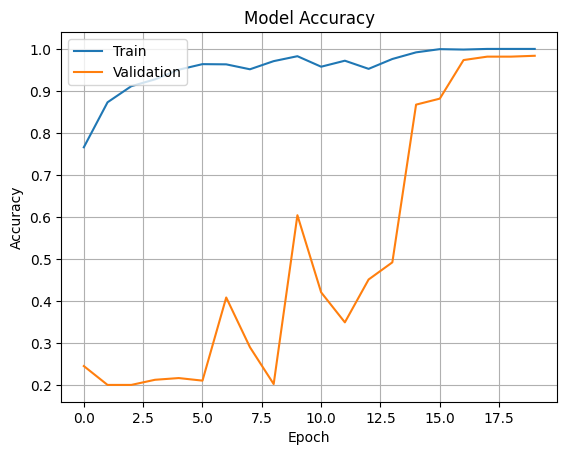

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Load base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Final classification layer for 5 classes
predictions = Dense(5, activation='softmax')(x)

# Build full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, validation_data=val_generator, epochs=20)

# Predict on test set
pred = model.predict(test_generator)
pred_indices = np.argmax(pred, axis=1)

# Get label mapping
labels = train_generator.class_indices
labels = dict((v, k) for k, v in labels.items())
predicted_classes = [labels[k] for k in pred_indices]

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# True labels from the test generator
y_test = test_generator.classes

# Predicted labels
pred2 = [labels[k] for k in pred_indices] 

# Convert true numeric labels to class names
true_labels = [labels[k] for k in y_test]

# Classification report
print(classification_report(true_labels, pred2))

# Accuracy
print("Accuracy of the Model:", "{:.1f}%".format(accuracy_score(true_labels, pred2) * 100))


              precision    recall  f1-score   support

    basophil       1.00      1.00      1.00       210
  eosinophil       0.93      0.95      0.94       210
  lymphocyte       1.00      1.00      1.00       210
    monocyte       0.99      1.00      1.00       210
  neutrophil       0.95      0.92      0.93       210

    accuracy                           0.97      1050
   macro avg       0.97      0.97      0.97      1050
weighted avg       0.97      0.97      0.97      1050

Accuracy of the Model: 97.3%


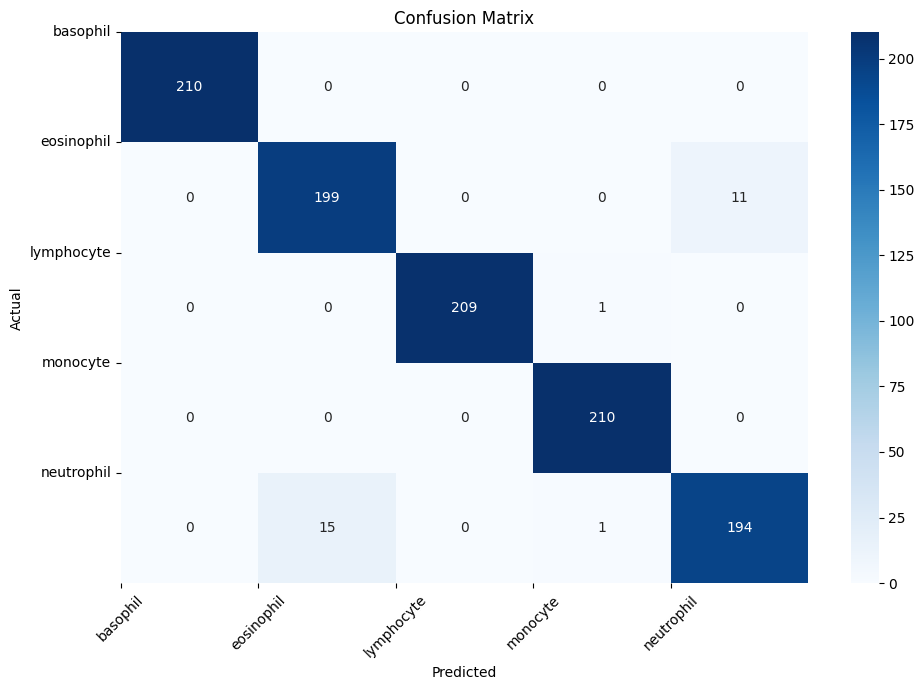

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get actual unique class labels from the dataset
class_labels = sorted(list(set(true_labels + pred2)))

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred2, labels=class_labels)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [19]:
# You got FileNotFoundError because the file "Blood Cell.h5" does not exist in your current working directory.

# ✅ First, make sure to save the model:
model.save("Blood Cell.h5")


In [20]:
from tensorflow.keras.models import load_model
model = load_model("Blood Cell.h5")
